# Mall Customers Segmentation

### 1. Import libraries

In [1]:
# General use
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 3D Visualization
import plotly as py
import plotly.graph_objs as go

### 2. Exploratory Data Analysis

In [2]:
df = pd.read_csv("Mall_Customers.xls", index_col = "CustomerID")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [3]:
# Statistics of data
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [4]:
df.info() # Check if we have any null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [5]:
df.drop(columns = ['Gender'], inplace = True) # Drop the gender to only have numerical values

C:\Users\apine\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

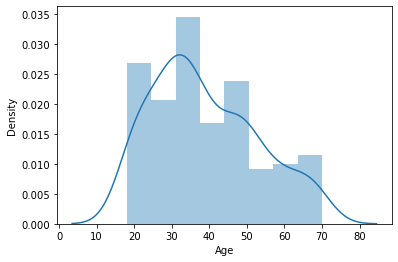

In [6]:
sns.distplot(df['Age']) #Distribution of data

C:\Users\apine\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Density'>

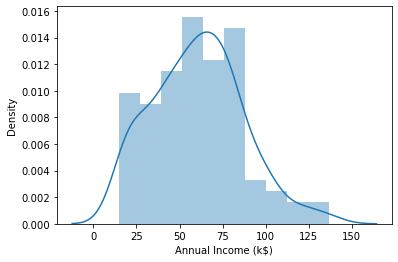

In [7]:
sns.distplot(df['Annual Income (k$)']) #Distribution of data

C:\Users\apine\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Density'>

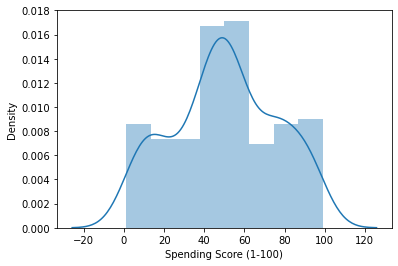

In [8]:
sns.distplot(df['Spending Score (1-100)']) #Distribution of data

### K-means Clustering

Centroid-based clustering algorithms. Maximizes the intracluster similarity and minimizes the intercluster similarity. To start we need to select the number of clusters we want, we don't usually know this, but there's a way to find the optimal number of clusters. k represents clusters. Algorithm tries to select a random number of k centers - centroids, then assign each instance to a cluster centroid. Then calculates the centroid for each cluster formed. Then assign each instance to the closest centroid, calculate again the centroid and repeat until centroids don't move anymore (stable solution).

K-means is one of the most known algorithms to find clusters, works with large datasets while being fast and efficient. This technique was developed in 1957!
- Centroid-based clustering algorithm
- Maximize intra-cluster similarity
- Minimize inter-Cluster similarity

To start we need to set the number of clusters for the K-Means algorithm - How many clusters do we want? - Usually represented by K.

1. Then, the algorithm will randomly select K centers, one for each cluster of data (which are called centroids)
2. Assign each instance to the closest centroid.
3. Calculate the centroids of each cluster formed
4. Return to step 2
5. End when the centroids no longer change

Randomly selected centroids impact the results ? Yes, but with scikit-learn

 #### 2.1.1 Client Segmentation with Annual Income and Spending Score

In [9]:
df1 = df[['Annual Income (k$)', 'Spending Score (1-100)']]

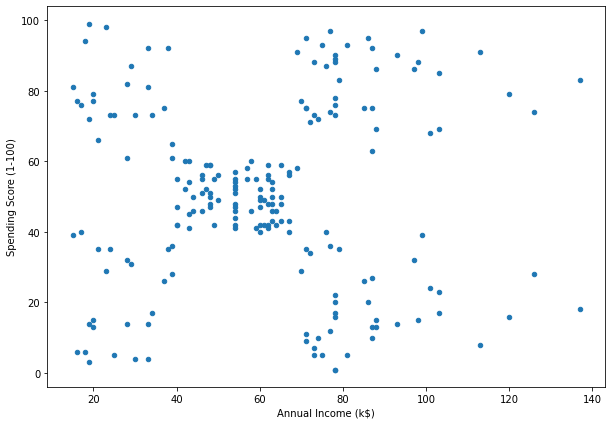

In [10]:
df1.plot(kind = 'scatter', 
         x = 'Annual Income (k$)',
         y = 'Spending Score (1-100)',
         figsize = (10,7))
plt.show()

#### 2.1.2 Finding the Optimal Number of Clusters with the Elbow Method

Limitation - we need to set the initial number of clusters. The elbow method helps us with that. Uses inertia from each number of clusters. The more clusters we have the closer all instances are to a centroid. The inertia decreases while the number of clusters increases. Let's compute that.

In [11]:
sum_ofsqr_dist = {} # Dictionary

for k in range(1,10): # Number of clusters
    km = KMeans (n_clusters = k, init = 'k-means++', max_iter = 1000) # Initialization method for cluster
    km = km.fit(df1) # Fit kmeans into data frame
    sum_ofsqr_dist[k] = km.inertia_ # inertia is an attribute of KMeans

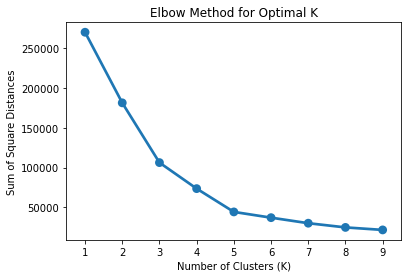

In [12]:
# Plot to visualize Elbow Method
sns.pointplot(x = list(sum_ofsqr_dist.keys()), y = list(sum_ofsqr_dist.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

We observe that inertia stops decreasing significantly at K=5, after that more clusters doesn't add much more information.

### 2.2 K-Means Clustering

In [13]:
Model = KMeans(n_clusters = 5,
              init = 'k-means++',
              max_iter = 1000)
Model.fit(df1)

KMeans(max_iter=1000, n_clusters=5)

In [14]:
print('Labels (clusters)', Model.labels_)

Labels (clusters) [3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 2 3 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 4 0 2 0 4 0 4 0 2 0 4 0 4 0 4 0 4 0 2 0 4 0 4 0
 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4
 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0]


In [15]:
print('Centroids', Model.cluster_centers_)

Centroids [[86.53846154 82.12820513]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [26.30434783 20.91304348]
 [88.2        17.11428571]]


In [16]:
centroids = Model.cluster_centers_

In [17]:
df1_cluster = df1.copy()
df1_cluster['Cluster'] = Model.fit_predict(df1)

In [18]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster
CustomerID,,,
1,15,39,3
2,15,81,4
3,16,6,3
4,16,77,4
5,17,40,3


 ##### 2.2.1 Visualization Clusters

In [19]:
Color = ['red', 'blue', 'black', 'gold', 'navy']
df1_cluster['Color'] = df1_cluster['Cluster'].map(lambda p:Color[p])

In [20]:
df1_cluster.head()

,Annual Income (k$),Spending Score (1-100),Cluster,Color
CustomerID,,,,
1,15,39,3,gold
2,15,81,4,navy
3,16,6,3,gold
4,16,77,4,navy
5,17,40,3,gold


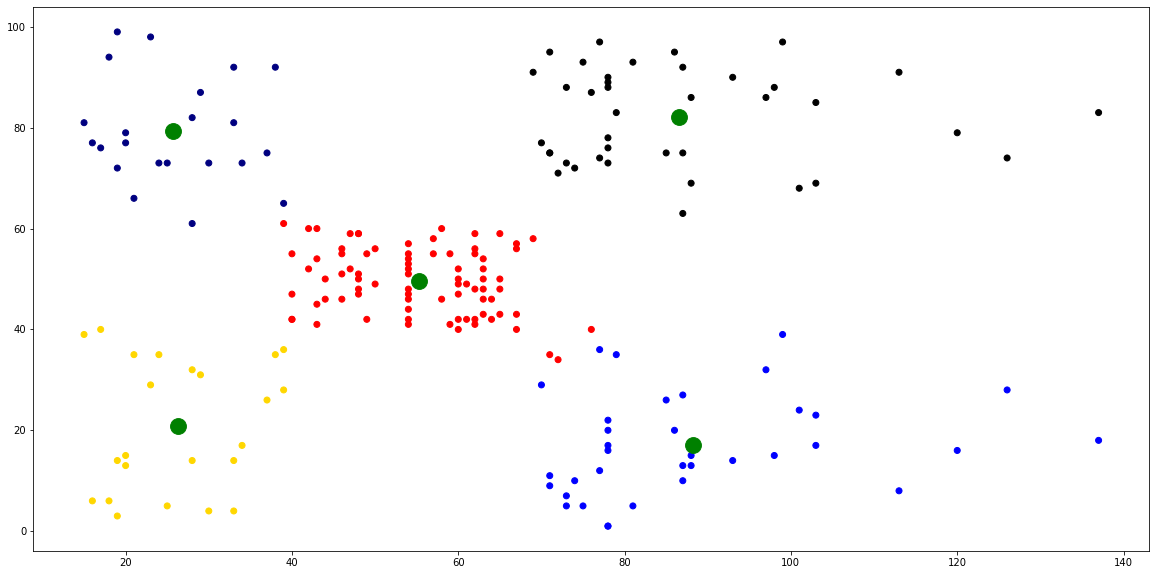

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df1['Annual Income (k$)'], 
            df1['Spending Score (1-100)'],
            c=df1_cluster['Color'])

plt.scatter(centroids[:,0], centroids[:,1], c='green', s=250)

#### 2.2.2 Evaulation with Silhouette Score

- The Silhouette score varies between +1 and -1
- When closer to +1, it means that the instances are well inside their own clusters
- When closer to 0, it means the instances are close to the clusters boundary
- When closer to -1, it means that the instances have been assigned to the wrong clusters

This method is usually more accurate than the Elbow method, so we will use it to evaluate the results we obtained. But ir requires more computational power.

In [22]:
labels = Model.labels_

In [23]:
silhouette_score(df1,labels)

0.553931997444648

In [24]:
# Compute silhouette score for each k

silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df1)
    silhouette[k] = silhouette_score(df1, km.labels_)

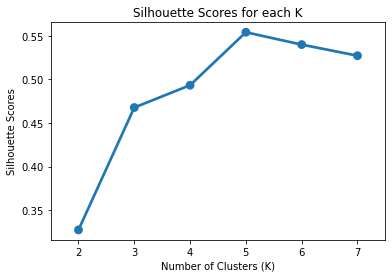

In [25]:
# Plot to visualize Silhouette Method

sns.pointplot(x = list(silhouette.keys()), y = list(silhouette.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for each K')
plt.show()

So we see the optimal k is indeed 5 clusters, since it has the closest value to 1.

## 2.3 Client Segmentation with All 3 Features

In [26]:
df2 = df.copy()

In [27]:
sum_ofsqr_dist = {} # Dictionary

for k in range(1,10): # Number of clusters
    km = KMeans (n_clusters = k, init = 'k-means++', max_iter = 1000) # Initialization method for cluster
    km = km.fit(df2) # Fit kmeans into data frame
    sum_ofsqr_dist[k] = km.inertia_ # inertia is an attribute of KMeans

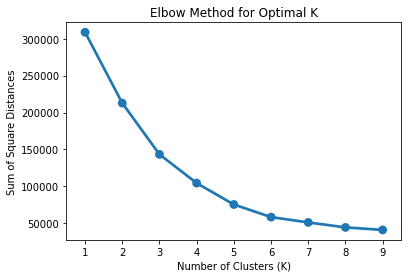

In [28]:
# Plot to visualize Elbow Method

sns.pointplot(x = list(sum_ofsqr_dist.keys()), y = list(sum_ofsqr_dist.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method for Optimal K')
plt.show()

The graph is slightly different. We'll try k=6 this time, because here intertia stops decreasing significantly.

In [35]:
Model2 = KMeans(n_clusters=6, init='k-means++', max_iter=1000)
Model2.fit(df2)

KMeans(max_iter=1000, n_clusters=5)

In [36]:
df2['Cluster'] = Model2.fit_predict(df2)
df2.head()

,Age,Annual Income (k$),Spending Score (1-100),Cluster,Label
CustomerID,,,,,
1,19,15,39,2,5
2,21,15,81,4,4
3,20,16,6,2,5
4,23,16,77,4,4
5,31,17,40,2,5


__3D Visualization__

In [37]:
labels = Model2.labels_
centroids = Model2.cluster_centers_

In [38]:
df2['Label'] = labels

trace = go.Scatter3d(
                    x=df['Age'],
                    y=df['Annual Income (k$)'],
                    z=df['Spending Score (1-100)'],
                    mode='markers',
                    marker=dict(color=df2['Label'], size=5, line=dict(color=df2['Label'], width=12),
                    opacity=0.8)
                    )

data = [trace]
layout = go.Layout(
                    title='Clusters',
                    scene=dict(
                                xaxis=dict(title='Age'),
                                yaxis=dict(title='Annual Income (k$)'),
                                zaxis=dict(title='Spending Score (1-100)'))
                                )


fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)
plt.show()

In [39]:
# Compute silhouette score for each k

silhouette = {}

for k in range(2,8):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=1000)
    km.fit(df2)
    silhouette[k] = silhouette_score(df1, km.labels_)

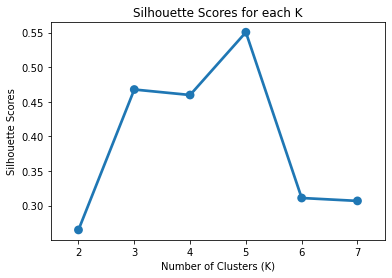

In [40]:
# Plot to visualize Silhouette Method

sns.pointplot(x = list(silhouette.keys()), y = list(silhouette.values()))
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Scores')
plt.title('Silhouette Scores for each K')
plt.show()

So k=6 was not the right choice, chosing n_clusters=5 would have been a better choice for the model.